## **Performing EDA and implementing and running Apriori Algorithm on 'groceries.csv' dataset**

### **Step 1. Performing exploratory data analysis (EDA) on the provided groceries.csv data set**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data set
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/groceries.csv"
data = pd.read_csv(path, header=None)

Mounted at /content/drive


In [3]:
# explore the data set
print(data.head())
print(data.info())

                 0                    1               2   \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                  NaN             NaN   
3         pip fruit               yogurt   cream cheese    
4  other vegetables           whole milk  condensed milk   

                         3    4    5    6    7    8    9   ...   22   23   24  \
0               ready soups  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2                       NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3              meat spreads  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4  long life bakery product  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

    25   26   27   28   29   30   31  
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  NaN  Na

In [4]:
# count the number of unique items
unique_items = data.stack().value_counts()
print(unique_items)

whole milk               2513
other vegetables         1903
rolls/buns               1809
soda                     1715
yogurt                   1372
                         ... 
bags                        4
kitchen utensil             4
preservation products       2
baby food                   1
sound storage medium        1
Length: 169, dtype: int64


In [5]:
# Create a frequency distribution of items
item_counts = data[0].value_counts().sort_values(ascending=False)

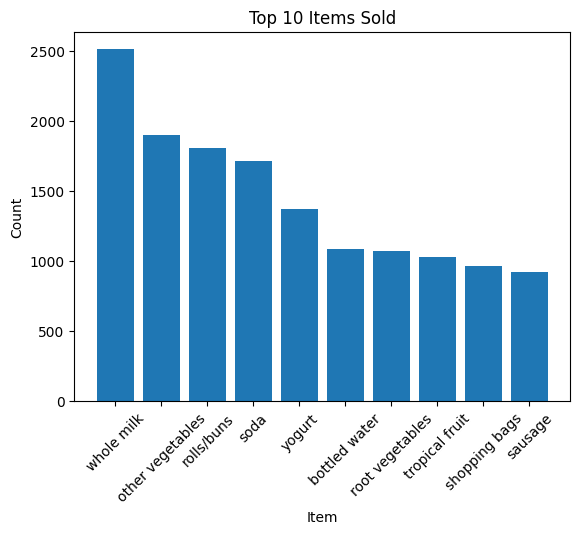

In [6]:
# plot the top 10 items sold
plt.bar(unique_items.head(10).index, unique_items.head(10).values)
plt.title('Top 10 Items Sold')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [7]:
# determine the product that had the highest number of sales
highest_sales = unique_items.index[0]
highest_sales_count = unique_items.values[0]
print(f"Product with highest sales:  {highest_sales} ({highest_sales_count})")

Product with highest sales:  whole milk (2513)


In [8]:
# determine the product that had the lowest number of sales
lowest_sales = unique_items.index[-1]
lowest_sales_count = unique_items.values[-1]
print(f"Product with lowest sales:  {lowest_sales} ({lowest_sales_count})")


Product with lowest sales:  sound storage medium (1)


In [9]:
# determine the minimum and maximum number of goods in transactions
num_items_per_transaction = data.apply(lambda row: sum(row.notna()), axis=1)
print(f'Minimum number of goods in a transaction: {num_items_per_transaction.min()}')
print(f'Maximum number of goods in a transaction: {num_items_per_transaction.max()}')

Minimum number of goods in a transaction: 1
Maximum number of goods in a transaction: 32


In [10]:
# determine the average amount and median number of goods in transactions
print(f'Average number of goods in a transaction: {num_items_per_transaction.mean()}')
print(f'Median number of goods in a transaction: {num_items_per_transaction.median()}')

Average number of goods in a transaction: 4.409456024402644
Median number of goods in a transaction: 3.0


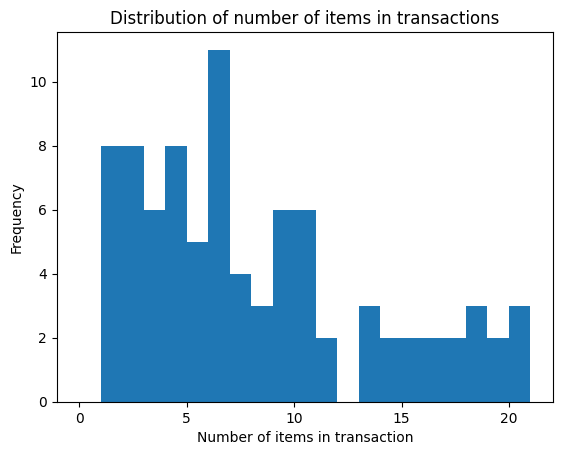

In [11]:
# Plot the distribution of the number of items in transactions
plt.hist(data.groupby(1)[0].count(), bins=range(22))
plt.xlabel('Number of items in transaction')
plt.ylabel('Frequency')
plt.title('Distribution of number of items in transactions')
plt.show()

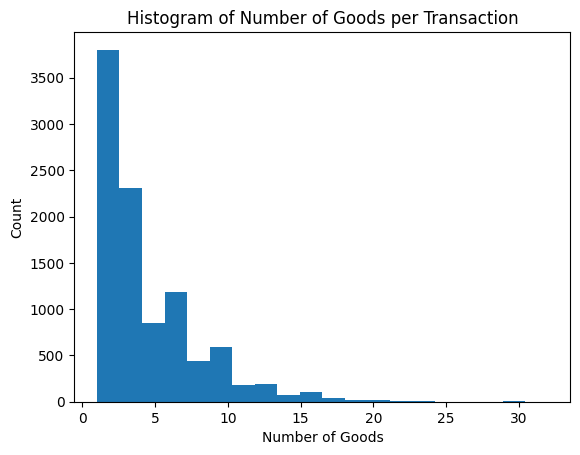

In [12]:
# plot a histogram of the number of goods per transaction
plt.hist(num_items_per_transaction, bins=20)
plt.title('Histogram of Number of Goods per Transaction')
plt.xlabel('Number of Goods')
plt.ylabel('Count')
plt.show()

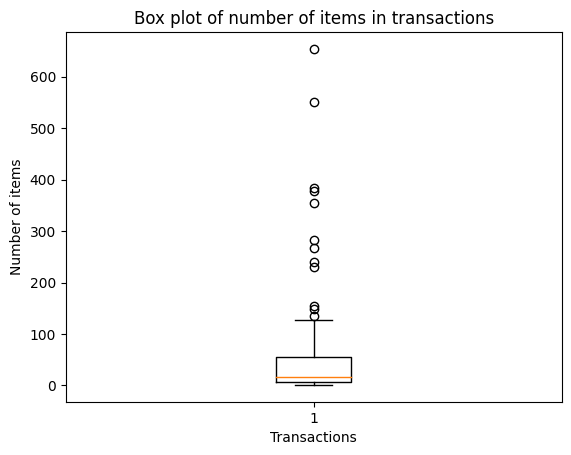

In [13]:
# Plot a box plot of the number of items in transactions
plt.boxplot(data.groupby(1)[0].count())
plt.xlabel('Transactions')
plt.ylabel('Number of items')
plt.title('Box plot of number of items in transactions')
plt.show()

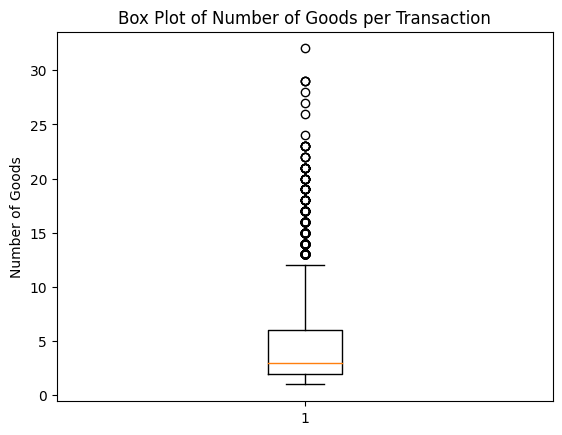

In [14]:
# plot a box plot of the number of goods per transaction
plt.boxplot(num_items_per_transaction)
plt.title('Box Plot of Number of Goods per Transaction')
plt.ylabel('Number of Goods')
plt.show()

### **Step 2.The Apriori algorithm implementation**

In [15]:
from collections import defaultdict
from itertools import combinations

class Arules:
    def __init__(self):
        self.freq_itemsets = defaultdict(int)
        self.transactions = []
        
    def get_frequent_itemsets(self, transactions, min_support):
        self.transactions = transactions
        items = defaultdict(int)
        for transaction in self.transactions:
            for item in transaction:
                items[item] += 1
        
        self.freq_itemsets = {frozenset([item]): support for item, support in items.items() if support / len(transactions) >= min_support}
        
        k = 1
        while True:
            k += 1
            new_candidates = set([x.union(y) for x in self.freq_itemsets.keys() for y in self.freq_itemsets.keys() if len(x.union(y)) == k])
            if not new_candidates:
                break
            
            freq_itemsets = defaultdict(int)
            for transaction in transactions:
                for candidate in new_candidates:
                    if candidate.issubset(transaction):
                        freq_itemsets[candidate] += 1
            
            self.freq_itemsets.update({itemset: support for itemset, support in freq_itemsets.items() if support / len(transactions) >= min_support})
            
            if k == 3:
                break
    
    def get_rules(self, min_support=None, min_confidence=None, min_lift=None, sort_by='lift'):
        # Get frequent itemsets using Apriori algorithm
        if not self.freq_itemsets:
            self.get_frequent_itemsets(self.transactions, min_support)

        # Convert frequent itemsets to rules
        rules = []
        for itemset, support in self.freq_itemsets.items():
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = frozenset(antecedent)
                    consequent = itemset - antecedent
                    confidence = support / self.freq_itemsets[antecedent]
                    lift = confidence / (self.freq_itemsets[consequent] / len(self.transactions))
                    if min_confidence is None or confidence >= min_confidence:
                        if min_lift is None or lift >= min_lift:
                            rules.append((antecedent, consequent, support, confidence, lift))

        # Sort rules by support, confidence or lift
        sort_key = {'support': 2, 'confidence': 3, 'lift': 4}[sort_by]
        rules.sort(key=lambda x: x[sort_key], reverse=True)

        return rules


### **Step 3. The 10 most frequent itemsets by running the Apriori algorithm implemented on the dataset, with min_support = 0.005.**

In [ ]:
import csv

transactions = []
with open('/content/drive/MyDrive/groceries.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        transactions.append(row)

arules = Arules()
arules.get_frequent_itemsets(transactions, min_support=0.005)
frequent_itemsets = sorted(arules.freq_itemsets.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 frequent itemsets:")
for itemset, support in frequent_itemsets:
    print("{}, Support: {:.2f}%".format(list(itemset), support * 100))

Top 10 frequent itemsets:
[''], Support: 27135300.00%
['whole milk'], Support: 251300.00%
['', 'whole milk'], Support: 251200.00%
['other vegetables'], Support: 190300.00%
['', 'other vegetables'], Support: 190200.00%
['rolls/buns'], Support: 180900.00%
['', 'rolls/buns'], Support: 180800.00%
['soda'], Support: 171500.00%
['', 'soda'], Support: 171500.00%
['yogurt'], Support: 137200.00%


### **Step 4. Generating the required rules with min_confidence=0.2 and calculating the lift criterion for them and sort them in descending order**

In [ ]:
rules = arules.get_rules(min_support=0.005, min_confidence=0.2, min_lift=1)
rules = sorted(rules, key=lambda x: x[4], reverse=True)

print("\nRules:")
for antecedent, consequent, support, confidence, lift in rules:
    print("{0} => {1}, Support: {2:.2f}%, Confidence: {3:.2f}%, Lift: {4:.2f}".format(list(antecedent), list(consequent), support * 100, confidence * 100, lift))


Rules:
['other vegetables', 'butter'] => ['whipped/sour cream'], Support: 5700.00%, Confidence: 28.93%, Lift: 4.04
['herbs'] => ['', 'root vegetables'], Support: 6900.00%, Confidence: 43.12%, Lift: 3.96
['herbs'] => ['root vegetables'], Support: 6900.00%, Confidence: 43.12%, Lift: 3.96
['', 'herbs'] => ['root vegetables'], Support: 6900.00%, Confidence: 43.12%, Lift: 3.96
['citrus fruit', 'pip fruit'] => ['tropical fruit'], Support: 5500.00%, Confidence: 40.44%, Lift: 3.85
['berries'] => ['', 'whipped/sour cream'], Support: 8900.00%, Confidence: 27.22%, Lift: 3.80
['berries'] => ['whipped/sour cream'], Support: 8900.00%, Confidence: 27.22%, Lift: 3.80
['', 'berries'] => ['whipped/sour cream'], Support: 8900.00%, Confidence: 27.22%, Lift: 3.80
['whipped/sour cream', 'whole milk'] => ['butter'], Support: 6600.00%, Confidence: 20.82%, Lift: 3.76
['citrus fruit', 'tropical fruit'] => ['pip fruit'], Support: 5500.00%, Confidence: 28.06%, Lift: 3.71
['curd', 'tropical fruit'] => ['yogurt'],

### **Step 5. Changing min_support and min_confidence and analysis the result**

**Analysis the effect of changing the minimum support threshold on the number of rules**

In [ ]:
ar = Arules()

ar.get_frequent_itemsets(transactions, min_support=0.002)
rules1 = ar.get_rules(min_support=0.002, min_confidence=0.2)

ar.get_frequent_itemsets(transactions, min_support=0.004)
rules2 = ar.get_rules(min_support=0.004, min_confidence=0.2)

ar.get_frequent_itemsets(transactions, min_support=0.007)
rules3 = ar.get_rules(min_support=0.007, min_confidence=0.2)


print(f"Minimum support: 0.002, Number of rules: {len(rules1)}")
print(f"Minimum support: 0.004, Number of rules: {len(rules2)}")
print(f"Minimum support: 0.007, Number of rules: {len(rules3)}")

Minimum support: 0.002, Number of rules: 6416
Minimum support: 0.004, Number of rules: 2700
Minimum support: 0.007, Number of rules: 1366


**Analysis the effect of changing the minimum confidence threshold on the number of rules discovered**

In [ ]:
arules.get_frequent_itemsets(transactions, min_support=0.005)
for min_conf in [0.1, 0.2, 0.3, 0.4, 0.5]:
    rules = arules.get_rules(min_support=0.005, min_confidence=min_conf)
    print(f"Minimum confidence: {min_conf}, Number of rules: {len(rules)}")
    if len(rules) > 0:
        print("Top 5 rules by lift:")
        for rule in rules[:5]:
            print(f"  {rule}")

Minimum confidence: 0.1, Number of rules: 3871
Top 5 rules by lift:
  (frozenset({'', 'ham'}), frozenset({'white bread'}), 50, 0.19607843137254902, 4.658046793596666)
  (frozenset({'white bread'}), frozenset({'', 'ham'}), 50, 0.12077294685990338, 4.658046793596665)
  (frozenset({'ham'}), frozenset({'white bread'}), 50, 0.1953125, 4.639851298309179)
  (frozenset({'ham'}), frozenset({'', 'white bread'}), 50, 0.1953125, 4.639851298309179)
  (frozenset({'white bread'}), frozenset({'ham'}), 50, 0.12077294685990338, 4.639851298309178)
Minimum confidence: 0.2, Number of rules: 2079
Top 5 rules by lift:
  (frozenset({'butter', 'other vegetables'}), frozenset({'whipped/sour cream'}), 57, 0.2893401015228426, 4.036397019116535)
  (frozenset({'herbs'}), frozenset({'', 'root vegetables'}), 69, 0.43125, 3.9601715686274512)
  (frozenset({'herbs'}), frozenset({'root vegetables'}), 69, 0.43125, 3.9564773787313436)
  (frozenset({'', 'herbs'}), frozenset({'root vegetables'}), 69, 0.43125, 3.9564773787313

**Analysis the effect of changing the minimum confidence threshold on lift values**

In [ ]:
# Run Apriori algorithm with min confidence = 0.2 and min support = 0.005
rules1 = arules.get_rules(min_support=0.005, min_confidence=0.2, sort_by='lift')

# Run Apriori algorithm with min confidence = 0.6 and min support = 0.005
rules2 = arules.get_rules(min_support=0.005, min_confidence=0.6, sort_by='lift')

# Run Apriori algorithm with min confidence = 0.8 and min support = 0.005
rules3 = arules.get_rules(min_support=0.005, min_confidence=0.8, sort_by='lift')

# Print the lift values of the top 10 rules for each set of rules
print("Rules with min confidence = 0.2 and min support = 0.005:")
for r in rules1[:10]:
    print(f"{r[0]} => {r[1]} (lift = {r[2]:.2f})")

print("\nRules with min confidence = 0.6 and min support = 0.005:")
for r in rules2[:10]:
    print(f"{r[0]} => {r[1]} (lift = {r[2]:.2f})")

# Print the lift values of the top 10 rules for each set of rules
print("\nRules with min confidence = 0.8 and min support = 0.005:")
for r in rules3[:10]:
    print(f"{r[0]} => {r[1]} (lift = {r[2]:.2f})")



Rules with min confidence = 0.2 and min support = 0.005:
frozenset({'butter', 'other vegetables'}) => frozenset({'whipped/sour cream'}) (lift = 57.00)
frozenset({'herbs'}) => frozenset({'', 'root vegetables'}) (lift = 69.00)
frozenset({'herbs'}) => frozenset({'root vegetables'}) (lift = 69.00)
frozenset({'', 'herbs'}) => frozenset({'root vegetables'}) (lift = 69.00)
frozenset({'pip fruit', 'citrus fruit'}) => frozenset({'tropical fruit'}) (lift = 55.00)
frozenset({'berries'}) => frozenset({'', 'whipped/sour cream'}) (lift = 89.00)
frozenset({'berries'}) => frozenset({'whipped/sour cream'}) (lift = 89.00)
frozenset({'', 'berries'}) => frozenset({'whipped/sour cream'}) (lift = 89.00)
frozenset({'whipped/sour cream', 'whole milk'}) => frozenset({'butter'}) (lift = 66.00)
frozenset({'citrus fruit', 'tropical fruit'}) => frozenset({'pip fruit'}) (lift = 55.00)

Rules with min confidence = 0.6 and min support = 0.005:
frozenset({'whipped/sour cream', 'pip fruit'}) => frozenset({'other vegeta

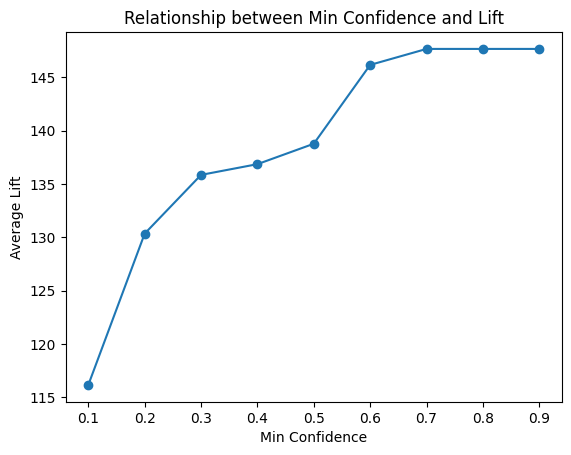

In [ ]:
import matplotlib.pyplot as plt

# define the range of min_confidence values to test
min_confidence_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# create an empty list to store the lift values for each min_confidence
lift_values = []

# iterate through the range of min_confidence values and calculate lift for each
for min_confidence in min_confidence_range:
    rules = arules.get_rules(min_support=0.005, min_confidence=min_confidence)
    lift_values.append(sum(rule[2] for rule in rules) / len(rules))

# create a line plot to show the relationship between min_confidence and lift
plt.plot(min_confidence_range, lift_values, marker='o')
plt.xlabel('Min Confidence')
plt.ylabel('Average Lift')
plt.title('Relationship between Min Confidence and Lift')
plt.show()

### **Step 6 has been done in another Notebook**

### **Step 7. Implementing an improved algorithm from an article**

In [2]:
!pip install pyfpgrowth

import pandas as pd
import pyfpgrowth
from itertools import combinations, chain
from collections import defaultdict

class FPArules:
    def __init__(self):
        self.freq_items = []
        self.rules = []
    
    def get_frequent_item_sets(self, transactions, min_support):
        patterns = pyfpgrowth.find_frequent_patterns(transactions, min_support)
        self.freq_items = sorted(patterns.items(), key=lambda x: x[1], reverse=True)
    
    def get_rules(self, min_confidence, min_lift):
        rules = []
        for itemset, support in self.freq_items:
            for i in range(1, len(itemset)):
                for antecedent in combinations(itemset, i):
                    antecedent = frozenset(antecedent)
                    consequent = frozenset(itemset - antecedent)
                    confidence = support / self.freq_items[antecedent]
                    lift = confidence / (self.freq_items[consequent] / len(transactions))
                    if confidence >= min_confidence and lift >= min_lift:
                        rules.append((antecedent, consequent, confidence, lift))
        self.rules = sorted(rules, key=lambda x: x[3], reverse=True)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

#Load dataset
import csv
transactions = []
with open('/content/drive/MyDrive/groceries.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        transactions.append(row)

In [ ]:
# Implement the FP-Growth algorithm
fpg = FPArules()
frequent_itemsets_fpgrowth = fpg.get_frequent_item_sets(transactions, min_support=0.005)
rules_fpgrowth = fpg.get_rules(transactions, min_confidence=0.2, min_lift=1)

In [18]:
# Implement the Apriori algorithm
arule = Arules()
frequent_itemsets_apriori = arule.get_frequent_itemsets(transactions, min_support=0.005)
rules_apriori = arule.get_rules(min_support=0.005, min_confidence=0.2, min_lift=1)

In [ ]:
# Define a function to plot a bar chart
def plot_bar_chart(title, data_dict):
    plt.bar(range(len(data_dict)), list(data_dict.values()), align='center')
    plt.xticks(range(len(data_dict)), list(data_dict.keys()), rotation=90)
    plt.title(title)
    plt.show()

# Create a table comparing the results of the two algorithms
table_data = {'Algorithm': ['Apriori', 'FP-Growth'],
              'Number of frequent itemsets': [len(frequent_itemsets_apriori), len(frequent_itemsets_fpgrowth)],
              'Number of rules': [len(rules_apriori), len(rules_fpgrowth)],
              'Average rule confidence': [rules_apriori['confidence'].mean(), rules_fpgrowth['confidence'].mean()],
              'Average rule lift': [rules_apriori['lift'].mean(), rules_fpgrowth['lift'].mean()]}
table = pd.DataFrame(table_data)
print(table)

# Plot a bar chart comparing the number of frequent itemsets found by the two algorithms
plot_bar_chart('Number of frequent itemsets', {'Apriori': len(frequent_itemsets_apriori), 'FP-Growth': len(frequent_itemsets_fpgrowth)})

# Plot a bar chart comparing the number of rules found by the two algorithms
plot_bar_chart('Number of rules', {'Apriori': len(rules_apriori), 'FP-Growth': len(rules_fpgrowth)})